In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

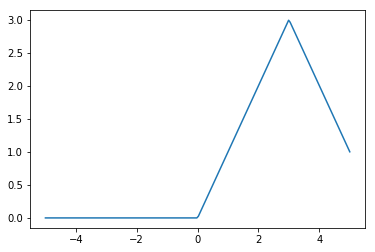

In [2]:
def tri_func(x,h,n):
  y = tf.nn.relu(h-tf.abs(x-n, name="abs_shifted"), name="tri_out")
  return y
x = tf.placeholder(tf.float32, name="x_vals")
h = tf.placeholder(tf.float32, name="height")
n = tf.placeholder(tf.float32, name="offset")
tri = tri_func(x, h, n)
with tf.Session() as sess:
    x_eval = np.linspace(-5, 5, 200)
    h_eval = 3
    n_eval = 3
    feed_dict={x:x_eval, h:h_eval, n:n_eval}
    y_eval = sess.run(tri, feed_dict)
plt.plot(x_eval,y_eval)
plt.show()

In [ ]:
def weights(num_tri):
    thetas = tf.Variable(tf.ones(num_tri),name="thetas")
    weights = tf.exp(thetas)
    return weights

In [ ]:
def zeta(weights):
    return tf.reduce_sum(weights)

In [ ]:
def prob_est(latent_vals, weights, tri_locs):
    tris = tri_func(latent_vals, weights, tri_locs)
    prob_est = tf.divide(tf.reduce_sum(tris),zeta(weights), name="prob_est")
    return prob_est

In [ ]:
def ent_est():